In [1]:
import os
import numpy as np
import pandas as pd
import math
import copy
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
#---------------------------------------
from pyLIMA.simulations import simulator
from pyLIMA import event
from pyLIMA import telescopes
from pyLIMA.models import PSPL_model
from pyLIMA.models import USBL_model
Ra = 267.92
Dec = -29.15
i=0
my_own_creation = event.Event(ra=Ra, dec=Dec)

my_own_creation.name = 'An event observed by Rubin'

LSST_u = simulator.simulate_a_telescope(name='u', time_start=2457365.5, 
                                        time_end=2457965.5, sampling=4, 
                                        location='Earth', camera_filter='I',
                                        uniform_sampling=True, astrometry=False)



my_own_creation.telescopes.append(LSST_u)

#coeficiente de limb darkening
my_own_creation.telescopes[0].ld_gamma = 0.5


cero_p = [ 27.03]

new_creation = copy.deepcopy(my_own_creation)

# uniform source with point lens
params = {'t0': (2457365.5+2457965.5)/2, 'u0': 0.01, 'tE': 50,'rho': 0.25,'s': 1,'q': 0.001,'alpha': 3.14,'piEN': 0.3,
          'piEE': 0.1}
t0 = params['t0']

my_own_parameters = []
for key in params:
    my_own_parameters.append(params[key])

my_own_model = USBL_model.USBLmodel(new_creation ,parallax=['Full', t0])
pyLIMA_parameters_1 = my_own_model.compute_pyLIMA_parameters(my_own_parameters)

magstar = [27.94]

fs = []
my_own_flux_parameters = []
np.random.seed(i)
G = []
for m in range(len(magstar)):
    ZP = cero_p[m]
    mag_baseline = magstar[m]
    flux_baseline = 10**((ZP-mag_baseline)/2.5)
    g = np.random.uniform(0,1)
    G.append(g)
    f_source = flux_baseline/(1+g)
    fs.append(f_source)
    my_own_flux_parameters.append(f_source)
    my_own_flux_parameters.append(g)
my_own_parameters += my_own_flux_parameters
pyLIMA_parameters = my_own_model.compute_pyLIMA_parameters(my_own_parameters)
simulator.simulate_lightcurve_flux(my_own_model, pyLIMA_parameters)

for k in range(len(new_creation.telescopes)):
    model_flux = my_own_model.compute_the_microlensing_model(new_creation.telescopes[k],
                                                             pyLIMA_parameters)['photometry']
    new_creation.telescopes[k].lightcurve_flux['flux'] = model_flux

plt.plot(new_creation.telescopes[k].lightcurve_flux['time'],new_creation.telescopes[k].lightcurve_flux['flux'])
plt.xlabel("Time")
plt.ylabel("Flux")
from pyLIMA.outputs import pyLIMA_plots
pyLIMA_plots.plot_geometry(my_own_model, my_own_parameters)
plt.show()

Parallax(Full) estimated for the telescope u: SUCCESS


In [8]:
# params = {'t0': (2457365.5+2457965.5)/2, 'u0': 0.01, 'tE': 50,'rho': 0.25,'s': 1,'q': 0.001,'alpha': 3.14,'piEN': 0.3,
#           'piEE': 0.1}

# params

Text(0, 0.5, 'Flux')

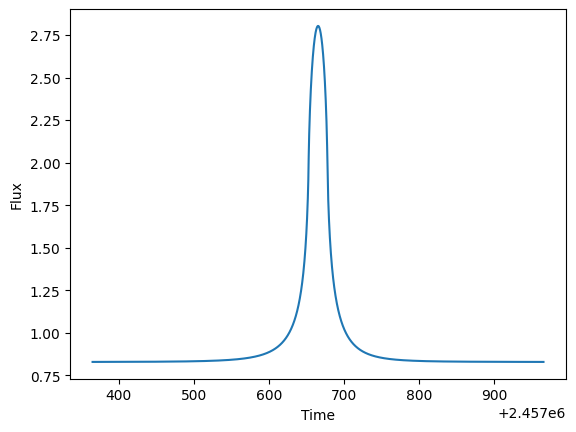

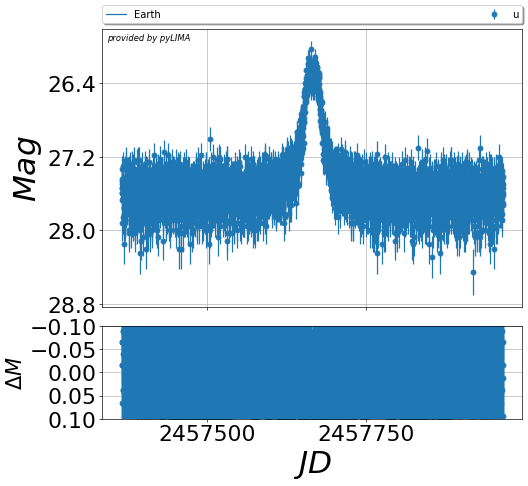

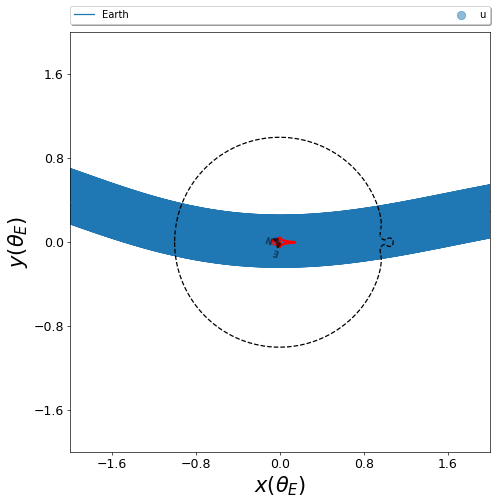

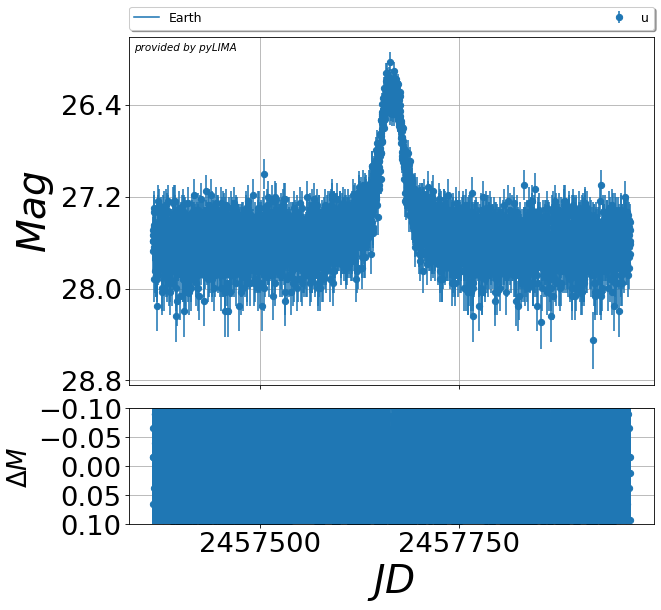

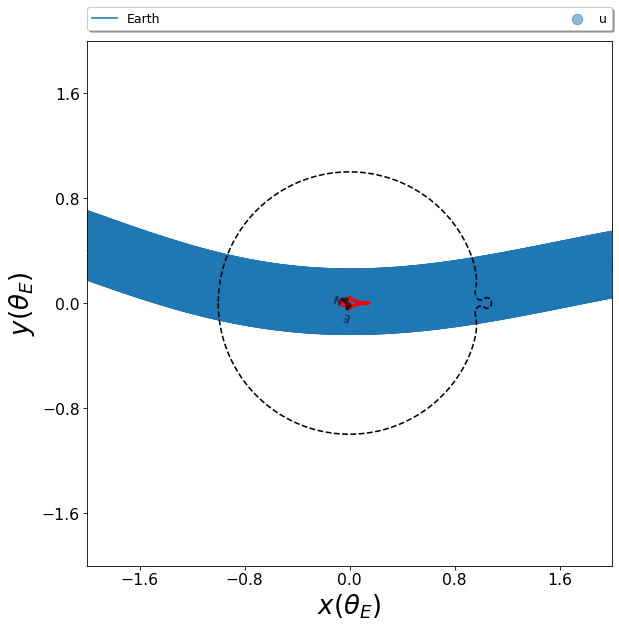

In [4]:
%matplotlib inline



pyLIMA_plots.plot_lightcurves(my_own_model, my_own_parameters)
